# Graduate Admission Prediction


In [232]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [233]:
df=pd.read_csv(r'D:\copy of htdocs\practice\Python\200days\Day175 DL_5\Admission_Predict_Ver1.1.csv')

In [234]:
df.shape

(500, 9)

In [235]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [237]:
df.isnull().sum()


Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [238]:
df.duplicated().sum()

0

In [239]:
df.drop(columns=['Serial No.'],inplace=True)

In [240]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [241]:
X=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [242]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [243]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [244]:
from sklearn.model_selection import train_test_split


In [245]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [246]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
238,310,104,3,2.0,3.5,8.37,0
438,318,110,1,2.5,3.5,8.54,1
475,300,101,3,3.5,2.5,7.88,0
58,300,99,1,3.0,2.0,6.80,1
380,322,104,3,3.5,4.0,8.84,1
...,...,...,...,...,...,...,...
255,307,110,4,4.0,4.5,8.37,0
72,321,111,5,5.0,5.0,9.45,1
396,325,107,3,3.0,3.5,9.11,1
235,326,111,5,4.5,4.0,9.23,1


In [247]:
from sklearn.preprocessing import MinMaxScaler

In [248]:
scalar = MinMaxScaler()

In [249]:
X_train_scaled= scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [250]:
X_train_scaled

array([[0.4       , 0.42857143, 0.5       , ..., 0.57142857, 0.50320513,
        0.        ],
       [0.56      , 0.64285714, 0.        , ..., 0.57142857, 0.55769231,
        1.        ],
       [0.2       , 0.32142857, 0.5       , ..., 0.28571429, 0.34615385,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.74038462,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.77884615,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.32051282,
        0.        ]])

In [251]:

import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [252]:
model = Sequential()

In [253]:
model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))

In [254]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 7)                 56        
                                                                 
 dense_22 (Dense)            (None, 7)                 56        
                                                                 
 dense_23 (Dense)            (None, 1)                 8         
                                                                 
Total params: 120 (480.00 Byte)
Trainable params: 120 (480.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [255]:
model.compile(loss='mean_squared_error',optimizer='Adam')

In [256]:
history=model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100


10/10 [==============================] - 1s 12ms/step - loss: 0.6939 - val_loss: 0.7024
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6131 - val_loss: 0.6213
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 0.5404 - val_loss: 0.5516
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 0.4787 - val_loss: 0.4907
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 0.4217 - val_loss: 0.4352
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 0.3673 - val_loss: 0.3740
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 0.3059 - val_loss: 0.2975
Epoch 8/100
10/10 [==============================] - 0s 4ms/step - loss: 0.2312 - val_loss: 0.2094
Epoch 9/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1561 - val_loss: 0.1315
Epoch 10/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0937 - val_loss: 0.0735
Epoch 11/100
10/10 [

In [257]:
y_pred=model.predict(X_test_scaled)

4/4 [==============================] - 0s 1ms/step


In [258]:
from sklearn.metrics import r2_score

In [259]:
r2_score(y_test,y_pred)

0.7918027522448402

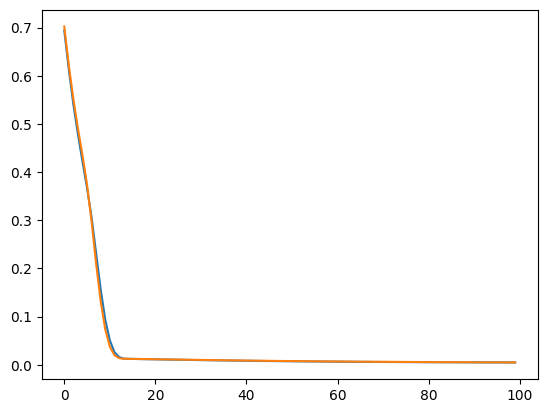

In [260]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])